## Aprendizaje supervisado

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/supervised-machine-learning.png)


Fuente de la imagen: javatpoint.com

### Tareas del aprendizaje supervisado:

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/regresionclasificacion.png)

### Matriz de confusión y métricas de clasificación


![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/confusionMatrx.jpg)


Metricas de regresión

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/metricas-regresion.png)
Fuente de la imagen: sitiobigdata.com


Para empezar retomemos el ejemplo de la notebook anterior y analicemos algunas cosas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

In [2]:
file = 'https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/datasets/binary_cancer/breast-cancer-wisconsin.data'
data_bcancer = pd.read_csv(file)
data_bcancer.head()

,clumb-thick,ucellsize,ucellshape,margadh,singlepcellsize,barenuclei,blandchr,normalnucleoli,mitoses,class
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
cols = data_bcancer.columns

df_clean = data_bcancer[cols].apply(pd.to_numeric, errors='coerce').fillna(0)
df_clean.head(5)

,clumb-thick,ucellsize,ucellshape,margadh,singlepcellsize,barenuclei,blandchr,normalnucleoli,mitoses,class
1000025,5,1,1,1,2,1.0,3,1,1,2
1002945,5,4,4,5,7,10.0,3,2,1,2
1015425,3,1,1,1,2,2.0,3,1,1,2
1016277,6,8,8,1,3,4.0,3,7,1,2
1017023,4,1,1,3,2,1.0,3,1,1,2


In [61]:
## Primero separamos el conjunto de entrenamiento con 75% y otro temporal con el 25%
data_train, data_temp = train_test_split(df_clean.values, train_size=0.75, shuffle=True)
## El temporal lo partimos en dos partes iguales para obtener conjuntos de validacion y de prueba
data_val, data_test = train_test_split(data_temp, test_size=0.5, shuffle=True)
## Separamos X y Y para cada nuevo conjunto
X_train, Y_train = data_train[:,:-1], data_train[:,-1]
X_val, Y_val = data_val[:,:-1], data_val[:,-1]
X_test, Y_test = data_test[:,:-1], data_test[:,-1]
X = np.concatenate((X_train, X_val), axis=0)
Y = np.concatenate((Y_train, Y_val), axis=0)
## Verificamos tamanos
np.shape(X_train), np.shape(X_test), np.shape(X_val), np.shape(Y_train), np.shape(Y_test), np.shape(Y_val), np.shape(X)

((524, 9), (88, 9), (87, 9), (524,), (88,), (87,), (611, 9))

In [70]:
# np.random.seed(12354)
clf = Perceptron(tol=10, random_state=False)
clf.fit(X_train, Y_train)

Perceptron(random_state=False, tol=10)

**Ejercicio:** Hagamos algunas predicciones:

In [71]:
clf.predict(np.array([3,1,1,1,2,2.0,3,1,1]).reshape(1,-1))

array([2.])

Probamos su metrica, en este caso su exactitud:

In [72]:
clf.score(X_test, Y_test)


0.8295454545454546

In [73]:
clf.score(X_test, Y_test)

0.8295454545454546

In [74]:
clf.score(X_train, Y_train) # 0.9408396946564885

0.8473282442748091

Grafiquemos su matriz de confusión y calculemos otras métricas:

In [76]:
# classification_report es sensitivity
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

In [133]:
# Calcular matriz de confusion
Y_predictions = clf.predict(X_test)
cm = confusion_matrix(Y_test, Y_predictions, labels=clf.classes_)
cm

array([[34, 15],
       [ 0, 39]])

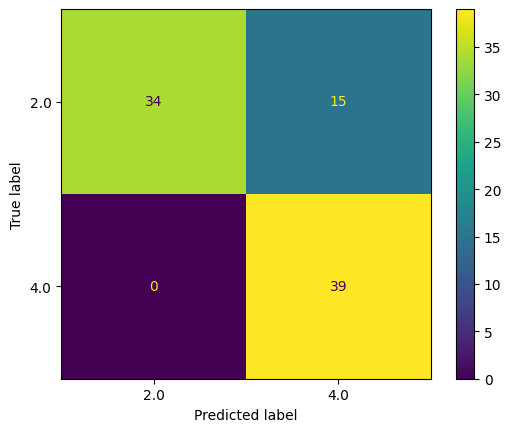

In [79]:
# Graficar mejor la matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [83]:
(34+39)/(34+39+15+0)

0.8295454545454546

In [84]:
accuracy_score(Y_test, Y_predictions)

0.8295454545454546

In [86]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

         2.0       1.00      0.69      0.82        49
         4.0       0.72      1.00      0.84        39

    accuracy                           0.83        88
   macro avg       0.86      0.85      0.83        88
weighted avg       0.88      0.83      0.83        88



## Curvas de validación

### Subajuste y sobreajuste

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/underfitting.png)
Fuente de la imagen: aprendemachinelearning.com

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/sklearnfitting.png)
Fuente de la imagen: sklearn.com

### Validación cruzada

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/crossvalidation.png)
Fuente de la imagen: Wikipedia.


In [88]:
from sklearn.model_selection import learning_curve

In [171]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(Perceptron(validation_fraction=0.2, tol=0.000000001), X, Y,
#                                                                       train_sizes=[0.8, 0.2,0.2],
                                                                        cv=30,return_times=True)

plt.plot(train_sizes,np.mean(train_scores,axis=1), label='training curve')
plt.plot(train_sizes,np.mean(test_scores,axis=1), label='valitation curve')
plt.xlabel('Data size')
plt.ylabel('Score')
plt.legend()

ValueError: ignored

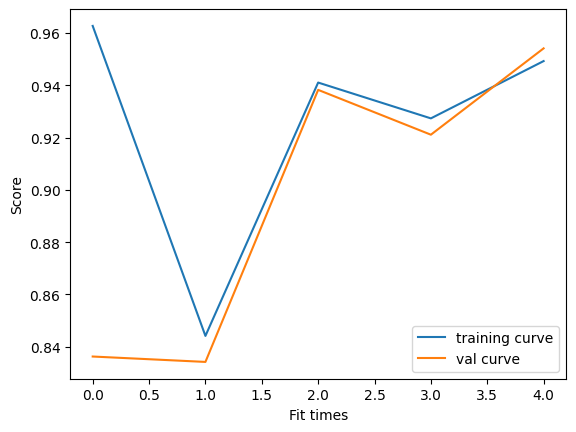

In [96]:
plt.plot(np.mean(train_scores,axis=1), label='training curve')
plt.plot(np.mean(test_scores,axis=1), label='val curve')
plt.xlabel('Fit times')
plt.ylabel('Score')
plt.legend()

### Revisar: https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

## Algoritmos de aprendizaje supervisado

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/supervisedMLalg.png)
Fuente de la imagen: hands-on.cloud

**Analicemos el algoritmo arboles de decisión**


![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/decisiontree.png)
Fuente de la imagen: jcchouinard.com

![](https://annalyzin.files.wordpress.com/2016/07/decision-tree-tutorial-animated3.gif)
Fuente del gif: algobeans.com

Probemos este algoritmo con sklearn, primero con un ejemplo trivial, el dataset iris y, después, capturar datos en el grupo y clasificar.

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

# Generamos un conjunto de datos de juguete, nada más para hacer pruebas
X = [[0, 0], [1, 1]]
Y = [0, 1]

X, Y

([[0, 0], [1, 1]], [0, 1])

In [102]:
arbol = DecisionTreeClassifier()
arbol = arbol.fit(X, Y)

[Text(0.5, 0.75, 'x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

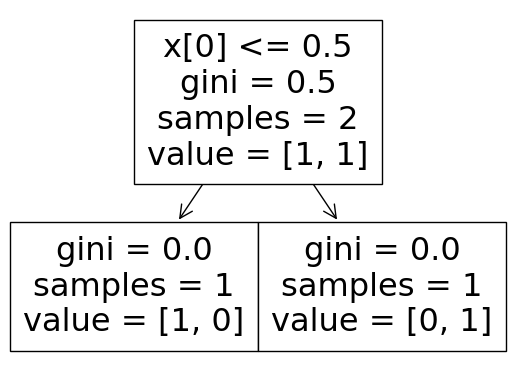

In [103]:
tree.plot_tree(arbol)

In [104]:
r = export_text(arbol)
print(r)

|--- feature_0 <= 0.50
|   |--- class: 0
|--- feature_0 >  0.50
|   |--- class: 1



In [113]:
test_set = np.array([0.6, 0.5]).reshape(1,-1)
arbol.predict(test_set)

array([1])

In [114]:
arbol.predict_proba(test_set)

array([[0., 1.]])

In [152]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
iris = load_iris()
iris_df = load_iris(as_frame=True).frame

X_iris = iris.data
Y_iris = iris.target

X_iris_train, X_iris_test = train_test_split(X_iris, train_size=0.8, random_state=0)
Y_iris_train, Y_iris_test = train_test_split(Y_iris, train_size=0.8, random_state=0)

iris_df.head(500)



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [151]:
np.shape(X_iris_train), np.shape(X_iris_test), np.shape(Y_iris_train), np.shape(Y_iris_test)

((120, 4), (30, 4), (120,), (30,))

In [128]:
labels = iris.target_names
labels

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [154]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(X_iris_train, Y_iris_train)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.048\nsamples = 41\nvalue = [0, 1, 40]')]

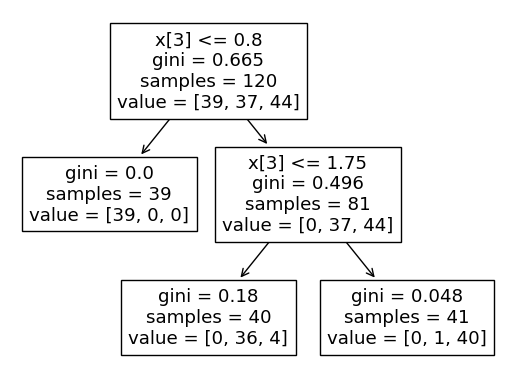

In [ ]:
tree.plot_tree(decision_tree)

In [126]:
# para graficar matriz de confusion de mas de una clase
import seaborn as sns

def plot_cm(Y_test, Y_pred, labels, porcentaje=False, cbar=False, ax=None):
    matrix = confusion_matrix(Y_test, Y_pred)
    #Aquí se divide si queremos en porcentaje o números
    if porcentaje==False:
        ax = sns.heatmap(matrix, annot=True, cmap="Spectral_r", cbar=cbar, cbar_kws={'label': 'scale'}, ax=ax)
#         ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
    if porcentaje==True:
        m=np.zeros(matrix.shape)
        for j in range(0,matrix.shape[1]):
            m[:,j]=matrix[:,j]/np.sum(matrix[:,j])*100

        ax = sns.heatmap(m, annot=True,cmap='Spectral_r', cbar=cbar, cbar_kws={'label': 'scale'}, ax=ax)

    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # ax.set(xlabel="True label", ylabel="Predicted label")

    return ax

Text(33.22222222222222, 0.5, 'True label')

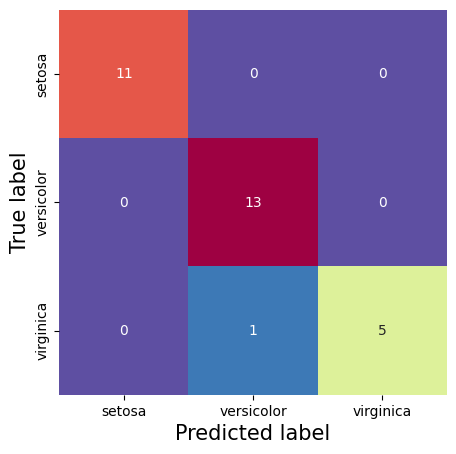

In [169]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

y_pred = decision_tree.predict(X_iris_test)
# y_test = np.argmax(Y_iris_test)
# y_pred = np.argmax(y_pred, axis=1)

plot_cm(Y_iris_test, y_pred, labels=labels, porcentaje=False, ax=ax)

plt.xlabel("Predicted label", fontsize=15)
plt.ylabel("True label", fontsize=15)

**Ejercicio**:
Predecir valores nuevos con el arbol entrenado y calcular alguna métrica.
Opcional (vale ejercicio extra): Graficar la métrica.

In [165]:
# x_new = np.array([[100, 300, 1200, 0.0005], [6.1, 3.5, 5.0, 1.9], [5.0, 3.3, 1.2, 0.5], [5.0, 10, 1.2, 0.5], [5.0, 1.3, 1.2, 0.5], [5.0, 3.3, 1.2, 0.5], [5.0, 3.3, 1.2, 0.5]]) #.reshape(1,-1)
x_new = np.random.randint(1, 4, (1, 4))
print(np.shape(x_new))

new_prediction = decision_tree.predict(x_new)
new_prediction

(1, 4)


array([1])

In [167]:
Y_iris_pred = decision_tree.predict(X_iris_test)
Y_iris_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [168]:
Y_iris_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [170]:
accuracy_score(Y_iris_test, Y_iris_pred)

0.9666666666666667

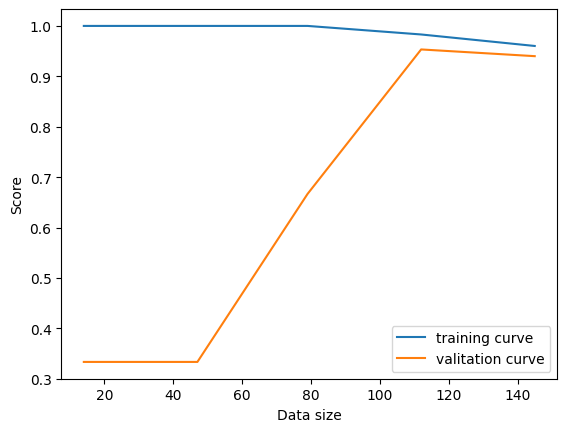

In [173]:
train_iris_sizes, train_iris_scores, test_iris_scores, fit_iris_times, _ = learning_curve(DecisionTreeClassifier(random_state=0, max_depth=2), X_iris, Y_iris,
#                                                                       train_sizes=[0.8, 0.2,0.2],
                                                                        cv=30, return_times=True)

plt.plot(train_iris_sizes,np.mean(train_iris_scores,axis=1), label='training curve')
plt.plot(train_iris_sizes,np.mean(test_iris_scores,axis=1), label='valitation curve')
plt.xlabel('Data size')
plt.ylabel('Score')
plt.legend()

**Práctica**:

1. Usar otro algoritmo de clasificación de sklearn y comparar sus métricas con las del árbol de decisión.

- Usar X_iris_train, Y_iris_train para entrenar (.fit)
- Usar X_iris_test, Y_iris_Test para predecir (.predict)

2. Usar otro conjunto de datos y utilizar algún algoritmo de clasificación de sklearn y realizar lo mismo que con el conjunto de datos iris.


In [193]:
# 1. importar metodo/algoritmo a utilizar, en este caso Naive-Bayes Gaussiano
from sklearn.naive_bayes import GaussianNB
# 2. Generar una instancia
model = GaussianNB()
# 3. Entrenar el modelo con .fit y nuestros datos de entrenamiento
model.fit(X_iris_train, Y_iris_train)

GaussianNB()

In [194]:
# 4. Evaluar modelo con .predict, conjunto de prueba y usar una metrica (p.ej. accuracy)
prediction_test = model.predict(X_iris_test)
accuracy_score(Y_iris_test, prediction_test)

0.9666666666666667

In [185]:
print("De un total de: %d registros, se predijeron mal: %d"%(X_iris_test.shape[0], (Y_iris_test != prediction_test).sum()))

De un total de: 30 registros, se predijeron mal: 1


In [189]:
(Y_iris_test != prediction_test).sum()

1

In [188]:
(Y_iris_test == prediction_test).sum()

29

Text(33.22222222222222, 0.5, 'True label')

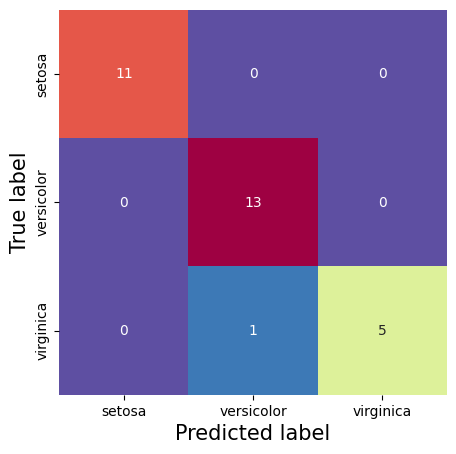

In [191]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

plot_cm(Y_iris_test, prediction_test, labels=labels, porcentaje=False, ax=ax)

plt.xlabel("Predicted label", fontsize=15)
plt.ylabel("True label", fontsize=15)

In [200]:
# Ahora se eligió un k-vecinos cercanos tipo centroide
from sklearn.neighbors import NearestCentroid
# se genera la instancia
clasificador = NearestCentroid()
#se entrena con fit y los datos de entrenamiento (train)
clasificador.fit(X_iris_train, Y_iris_train)

NearestCentroid()

In [201]:
# Evaluar modelo con .predict, conjuntos de prueba (test) y una metrica
predicciones_kvecinos = clasificador.predict(X_iris_test)

In [202]:
accuracy_score(Y_iris_test, predicciones_kvecinos)

0.9

Text(33.22222222222222, 0.5, 'True label')

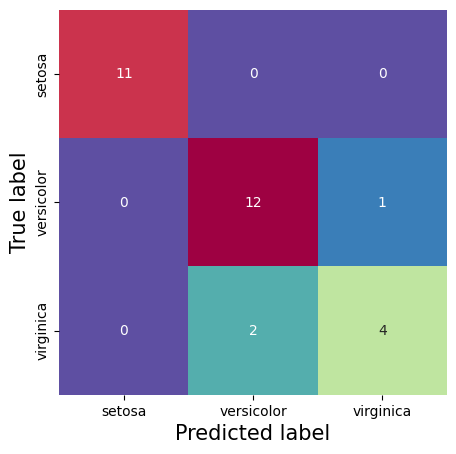

In [203]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

plot_cm(Y_iris_test, predicciones_kvecinos, labels=labels, porcentaje=False, ax=ax)

plt.xlabel("Predicted label", fontsize=15)
plt.ylabel("True label", fontsize=15)